In [10]:
# ejercicios de Seaborn

In [11]:
# 1. Importa pandas, pyplot y seaborn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#import pandas.util.testing as tm


In [3]:
# 2. Activa matplotlib de forma estática

In [4]:
%matplotlib inline

In [5]:
# 3. Lee 'Pokemon.csv', lee la primera columna del csv como índice del DataFrame

In [6]:

df = pd.read_csv('data/Pokemon.csv', encoding='latin1', index_col=0)

In [7]:
# 4. Mira las primeras filas del dataset para hacerte una idea de los datos cargados

In [8]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [9]:
# 5. Haz un scatter plot con lmplot(), que es el método que pinta una regresión lineal
# Pasa el DataFrame como argumento del método en el parámetro llamado data
# Usa Attack y Defense para el scatter

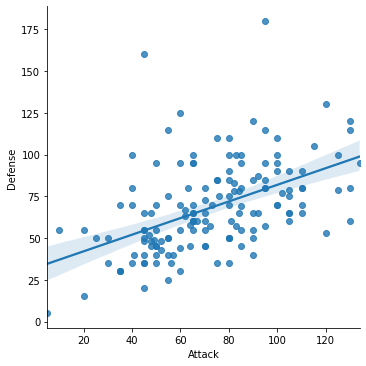

In [10]:
sns.lmplot(x='Attack', y='Defense', data=df);

In [11]:
# 6. No queremos ver la línea recta de la regresión lineal.
# prueba a añadir fit_reg a falso

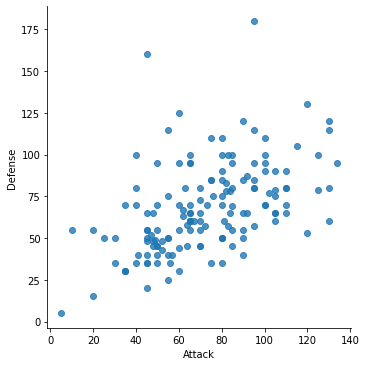

In [13]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False);

In [35]:
# 7. Vamos a decir qué variable (columna del DataFrame) codifica los colores (hue)
# Que el hue sea el Stage

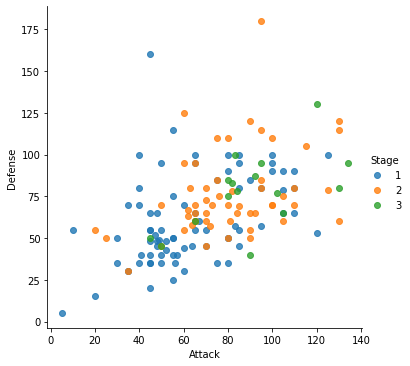

In [15]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage');

In [37]:
# 8. Limita el eje x entre 20 y 100

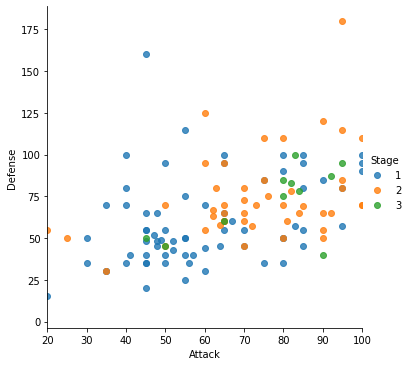

In [16]:
grid = sns.lmplot(x='Attack',
                  y='Defense',
                  data=df,
                  fit_reg=False,
                  hue='Stage')

grid.set(xlim=(20, 100));

In [39]:
# Recordamos los diagramas de caja

<img src="BoxPlot.png">

In [40]:
# 9. Dibuja un diagrama de cajas con el dataframe

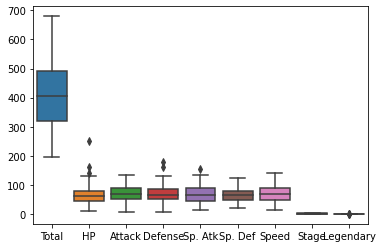

In [17]:
sns.boxplot(data=df);

In [42]:
# 10. No nos interesan las columnas Total, Stage ni Legendary
# Bórralos del DataFrame y vuelve a dibujar el diagrama de cajas

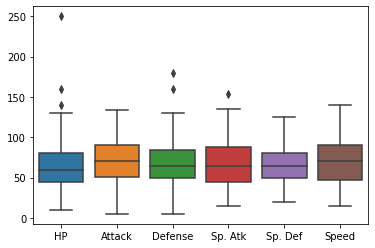

In [18]:
df_reducido = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

sns.boxplot(data=df_reducido);

In [44]:
# 11. Mira cuántos 'Type 1' diferentes hay en el DataFrame

In [19]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

In [46]:
# 12. Quédate del Dataframe solo con los 'Type 1' iguales a 'Grass', 'Fire' o 'Water'

In [21]:
#df_grass_fire_water = df[((df['Type 1']=='Grass') | (df['Type 1']=='Fire') | (df['Type 1']=='Water'))]
df_grass_fire_water = df[df['Type 1'].isin(['Grass', 'Fire', 'Water'])]

In [48]:
# 13. Usa un estilo 'whitegrid'

In [22]:
sns.set_style('whitegrid')

In [50]:
# 14. Pinta diagramas de violín con el DataFrame
# 

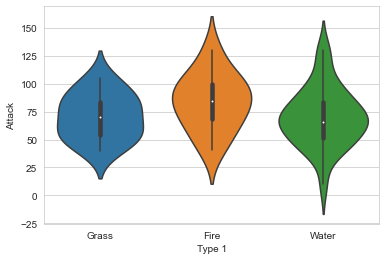

In [23]:
sns.violinplot(x='Type 1', y='Attack', data=df_grass_fire_water);
#sns.violinplot(data=df_grass_fire_water)

In [52]:
# 15. Escribe una lista de colores con valores '#78C850', '#F08030',  '#6890F0'

In [24]:
pokemon_colores = ['#78C850', '#F08030',  '#6890F0']

In [54]:
# 16. Pinta de nuevo los diagramas de violín añadiendo esos colores en la paleta (palette)

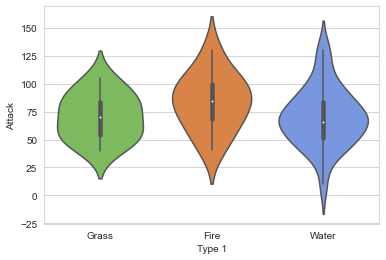

In [26]:
sns.violinplot(x='Type 1',
               y='Attack',
               data=df_grass_fire_water,
               palette = pokemon_colores);

In [52]:
# 17. Con el diagrama de violín vemos la forma de la distribución, pero no sabemos si Grass tiene muchos puntos y Fire tiene muy pocos.
# Para ver esto, usamos el swarmplot.
# Pinta el último diagrama de violines pero con un swarmplot en lugar de un violin

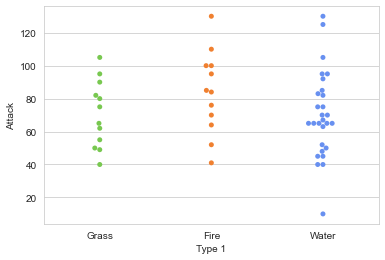

In [27]:
sns.swarmplot(x='Type 1',
              y='Attack',
              data=df_grass_fire_water,
              palette = pokemon_colores);

In [ ]:
# 18. Queremos ver los violines a la vez que los swarm, los podemos pintar juntos. 
# Elimina los diagramas de caja dentro de los violines con el parámetro inner = None y pon una transparencia de 0.9
# Pon un título con pyplot (como siempre)

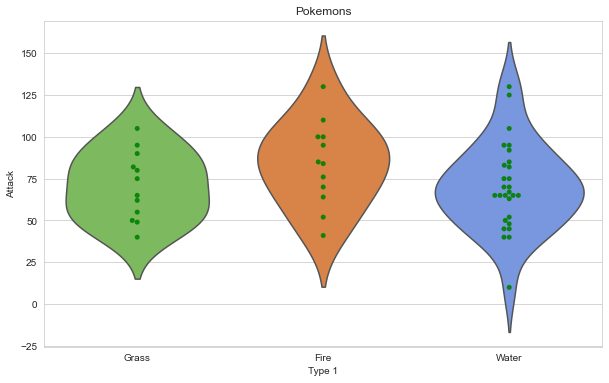

In [28]:
plt.figure(figsize=(10,6))
 
sns.violinplot(x='Type 1',
               y='Attack',
               data=df_grass_fire_water,
               inner=None,
               palette=pokemon_colores)
 
sns.swarmplot(x='Type 1',
              y='Attack',
              data=df_grass_fire_water,
              color='g',
              alpha=0.9) 
 
plt.title('Pokemons');



In [64]:
# 19. Veamos la función melt() de pandas. Melt toma los valores de varias columnas y los junta todos en una misma columna nueva.
# Dado un DataFrame, melt recibe varios parámetros:
# * qué columnas del DataFrame se quedan igual
# * qué nombres de columnas del dataframe pasan a ser una columna nueva
# * cómo queremos llamar esas nuevas columnas

# Primero recuerda el Dataframe df_grass_fire_water con las primeras 5 filas

In [65]:
df_grass_fire_water.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [31]:
# 20. Queremos dejar igual las variables 'Name' y 'Type 1'
# Queremos añadir una columa nueva cuyos valores sean las columnas que queremos apilar y que se llame 'New Column'
# Escribimos df_grass_fire_water.melt(id_vars=['Name', 'Type 1'], value_vars=[...], var_name='New Column')

In [32]:
df_grass_fire_water.melt(id_vars=['Name', 'Type 1'],
                         value_vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'],
                         var_name='Melted')

,Name,Type 1,Melted,value
0,Bulbasaur,Grass,HP,45
1,Ivysaur,Grass,HP,60
2,Venusaur,Grass,HP,80
3,Charmander,Fire,HP,39
4,Charmeleon,Fire,HP,58
...,...,...,...,...
411,Gyarados,Water,Legendary,False
412,Lapras,Water,Legendary,False
413,Vaporeon,Water,Legendary,False
414,Flareon,Fire,Legendary,False


In [33]:
pd_melted = df_grass_fire_water.melt(id_vars=['Name', 'Type 1'], value_vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'], var_name='Melted')

pd_melted

,Name,Type 1,Melted,value
0,Bulbasaur,Grass,HP,45
1,Ivysaur,Grass,HP,60
2,Venusaur,Grass,HP,80
3,Charmander,Fire,HP,39
4,Charmeleon,Fire,HP,58
...,...,...,...,...
411,Gyarados,Water,Legendary,False
412,Lapras,Water,Legendary,False
413,Vaporeon,Water,Legendary,False
414,Flareon,Fire,Legendary,False


In [34]:
# Hemos juntado en el melt 8 columnas


In [35]:
print(df_grass_fire_water.shape)
print(pd_melted.shape)
# las filas se han multiplicado por 8

(52, 12)
(416, 4)


In [36]:
# 21. Pintamos el swarmplot con el melted y entendemos la información

C:\Users\Daney\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Daney\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


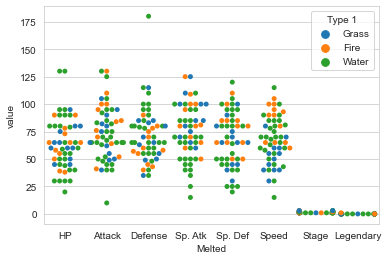

In [37]:
sns.swarmplot(x='Melted', y='value', data=pd_melted, hue='Type 1');

In [38]:
# conclusión: hemos creado una columna que contiene todos los datos que antes teníamos en varias columnas
# usamos esa columna en el X de swarmplot, así que va a pintar cada categoría de esa columna nueva
# dentro de cada categoría, pintamos cuántos puntos tenemos de cada valor Y 
# además, elegimos en hue (codificación de color) qué división de colores queremos aplicar
# por último, las categorías con valores numéricos, pintan números
# y las categorías con valores booleanos (Stage, Legendary), pintan 0 (False) y 1 (True), esto no es muy útil

In [39]:
# 22. Basándote en el gráfico anterior, define el tamaño de la figura en (10,6) (usa plt)
# En el swarmplot añade el argumento dodge a True y usa la anterior paleta de colores Pokemon

# Dodge en inglés es "esquivar", ¿qué diferencia ves?

# Usando plt 
# fija el límite del eje Y entre 0 y 200
# fija la leyenda con bbox_to_anchor en upper left. Pista: upper left es el código 2 y se usa el parámetro loc.


C:\Users\Daney\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Daney\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Daney\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Daney\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Daney\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.3% of the points 

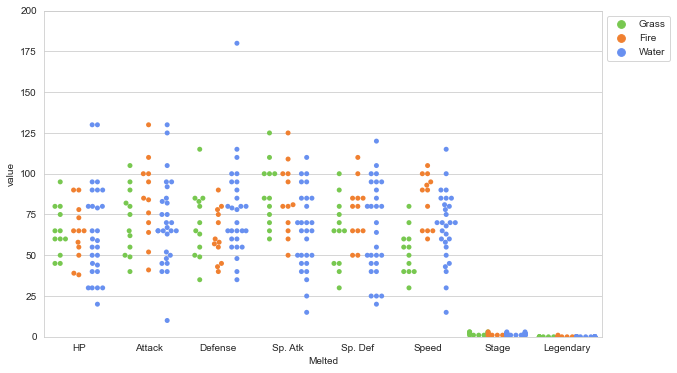

In [40]:
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Melted', 
              y='value', 
              data=pd_melted, 
              hue='Type 1', 
              dodge=True, 
              palette=pokemon_colores)
 
# 4. Adjust the y-axis
plt.ylim(0, 200)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)


In [41]:
# Observa que incluso usando Seaborn, usamos Pyplot para trabajar con los ejes, la leyenda y el tamaño
# Lo importante es que Seaborn y Pyplot conviven bien juntos

In [42]:
# 23. Mapas de calor
# Calcula las correlaciones del primer DataFrame original df
# Pista: las correlaciones se calculan con el método corr()
# Recuerda: las correlaciones miden entre dos variables, si varío una, cuánto me varía la otra (cómo están de relacionadas)

In [43]:
correladas = df.corr()
correladas

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Total,1.000000,0.576591,0.670939,0.508694,0.680745,0.774383,0.506950,0.504224,0.328412
HP,0.576591,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939,0.249207,0.172441
Attack,0.670939,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701,0.361321,0.147486
Defense,0.508694,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252,0.270861,0.141576
Sp. Atk,0.680745,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516,0.391712,0.334159
Sp. Def,0.774383,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656,0.358308,0.215314
Speed,0.506950,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000,0.240042,0.199969
Stage,0.504224,0.249207,0.361321,0.270861,0.391712,0.358308,0.240042,1.000000,-0.142508
Legendary,0.328412,0.172441,0.147486,0.141576,0.334159,0.215314,0.199969,-0.142508,1.000000


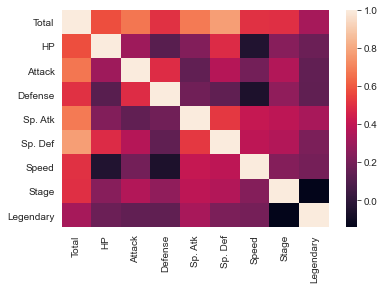

In [44]:
sns.heatmap(correladas);

In [113]:
# ¿la correlación entre qué valores se encuentra?
# la autocorrelación es la correlación de una variable consigo misma, ¿qué aprecias?
# Encuentra dos variables que veas que están fuertemente relacionadas según la correlación
# Si tuvieras una matriz de correlación muy grande y te cobrasen por cada dato que lees, ¿qué harías?

In [45]:
# 24. Pinta el histograma y la densidad de probabilidad del nivel de defensa usando el DataFrame original

C:\Users\Daney\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


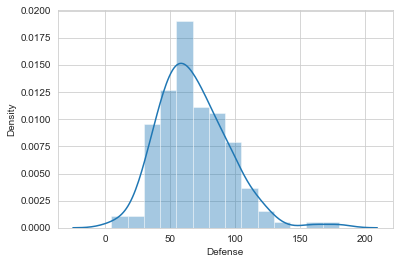

In [46]:
sns.distplot(df.Defense);

In [47]:
# 25. Pinta un diagrama de barras de la columna 'Type 1' usando el DataFrame original
# Usa un sns.countplot
# Usa plt.xticks y gira las etiquetas

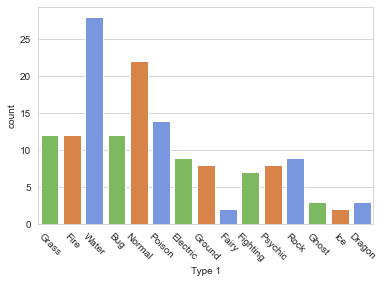

In [48]:
sns.countplot(x='Type 1', data=df, palette=pokemon_colores)

plt.xticks(rotation=-45);

In [128]:
# 26. Usa catplot con el DataFrame original. Muestra el valor de Defense según el 'Type 1', muestra un subplot para legendarios y otro para no legendarios
# y divide los colores según el Type 2

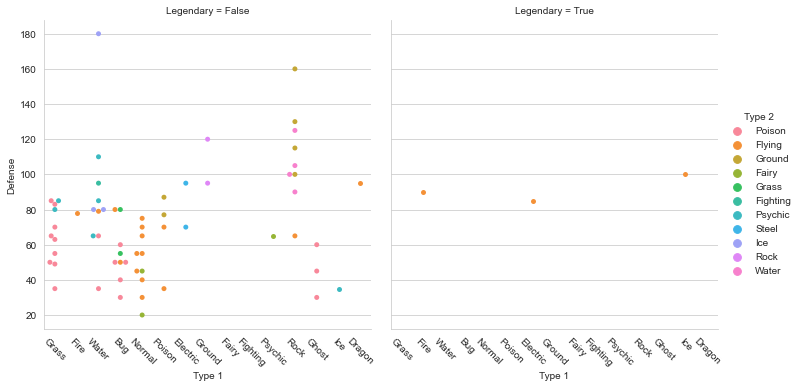

In [50]:
g = sns.catplot(x='Type 1',
                y='Defense',
                data=df,
                hue='Type 2',
                col='Legendary',
                kind='swarm')

g.set_xticklabels(rotation=-45);

In [131]:
# 27. Muestra una función distribución de probabilidad con kdeplot (curvas de nivel) de la defensa respecto al ataque.
# Di un bin 2D donde caigan muchos puntos (ataque, defensa).

C:\Users\Daney\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


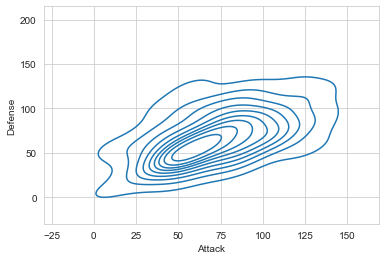

In [52]:
sns.kdeplot(df.Attack, df.Defense);

In [53]:
# 29. Pinta una distribución de probabilidad conjunta, pintando la defensa respecto al ataque del DataFrame original

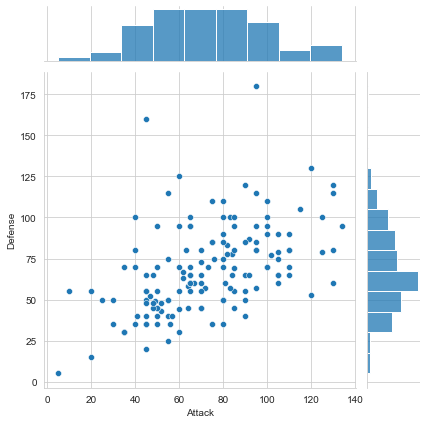

In [55]:
sns.jointplot(x='Attack', y='Defense', data=df);